**1. Loading and Cleaning the Dataset**

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset (adjust the file path as necessary)
file_path = 'data.csv'
data = pd.read_csv(file_path, delimiter=';')

# Remove the target column 
if 'Target' in data.columns:
    data_unsupervised = data.drop(columns=['Target'])
else:
    data_unsupervised = data

# Standardize numerical features
numerical_columns = data_unsupervised.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
data_unsupervised[numerical_columns] = scaler.fit_transform(data_unsupervised[numerical_columns])

# Save or inspect the cleaned and standardized dataset
print("Cleaned and standardized dataset:")
print(data_unsupervised.head())



Cleaned and standardized dataset:
   Marital status  Application mode  Application order    Course  \
0       -0.294829         -0.095470           2.490896 -4.209520   
1       -0.294829         -0.209869          -0.554068  0.192580   
2       -0.294829         -1.010660           2.490896  0.103404   
3       -0.294829         -0.095470           0.207173  0.444115   
4        1.356212          1.162916          -0.554068 -0.408389   

   Daytime/evening attendance\t  Previous qualification  \
0                      0.350082                -0.35023   
1                      0.350082                -0.35023   
2                      0.350082                -0.35023   
3                      0.350082                -0.35023   
4                     -2.856470                -0.35023   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                       -0.804841    -0.126298               -0.036018   
1                        2.076819    -0.126298        

**2. Exploratory Data Analysis (EDA)**

C:\Windows\Temp\ipykernel_8804\1230856568.py:10: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\CG USER\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


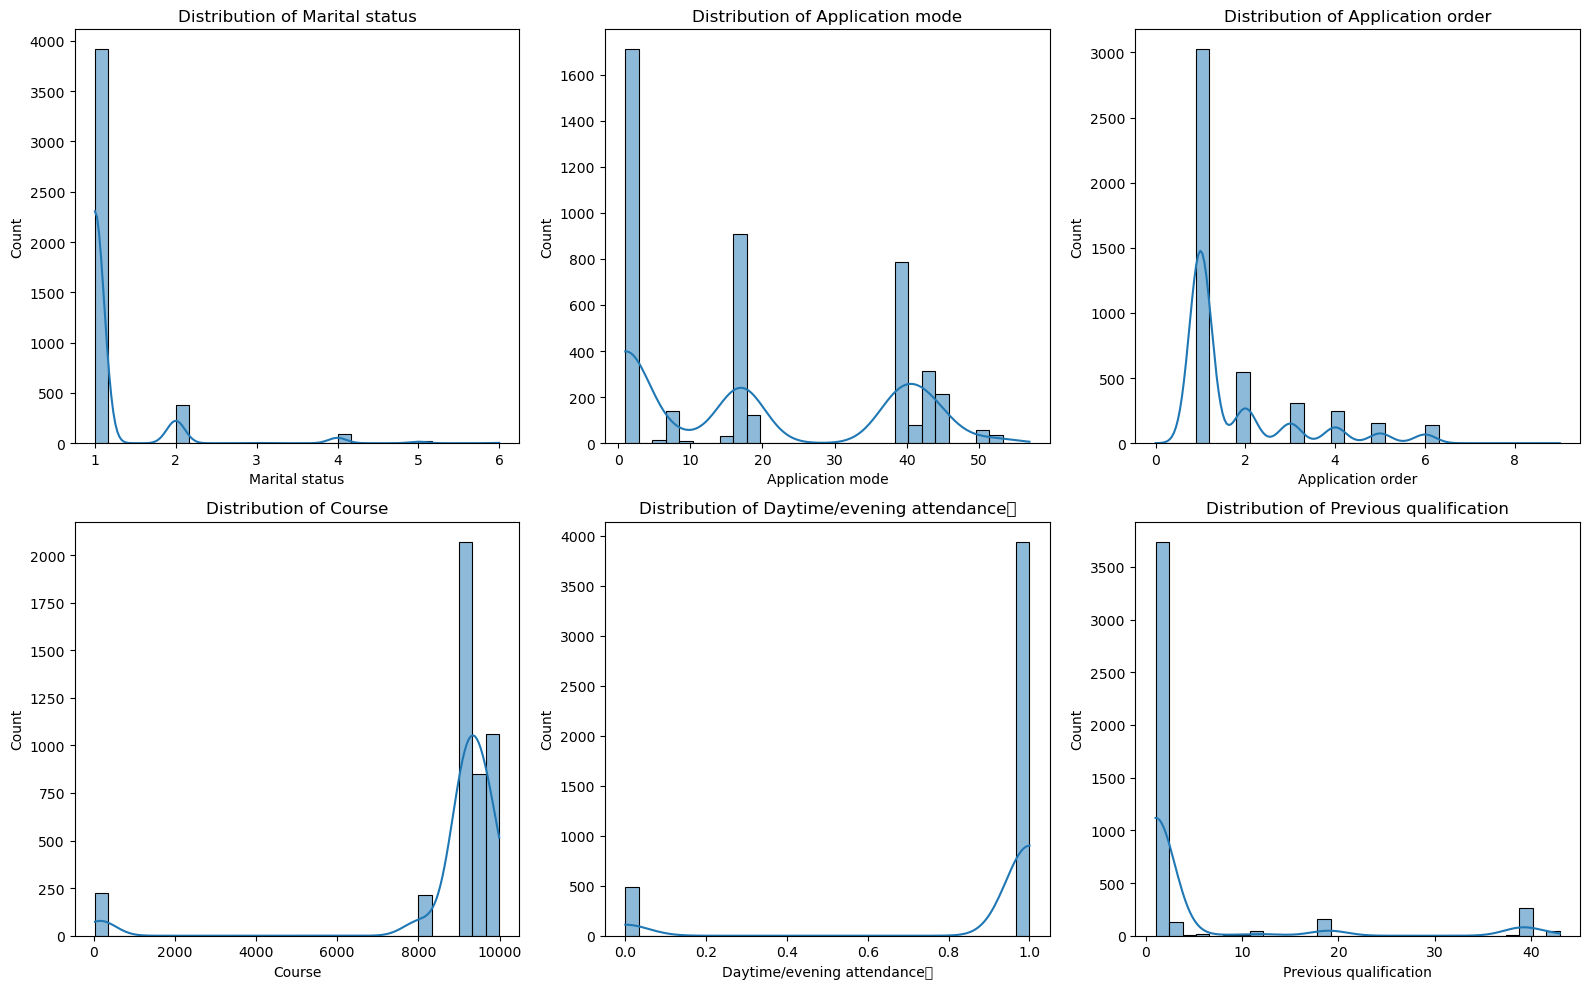

C:\Users\CG USER\miniconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\CG USER\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


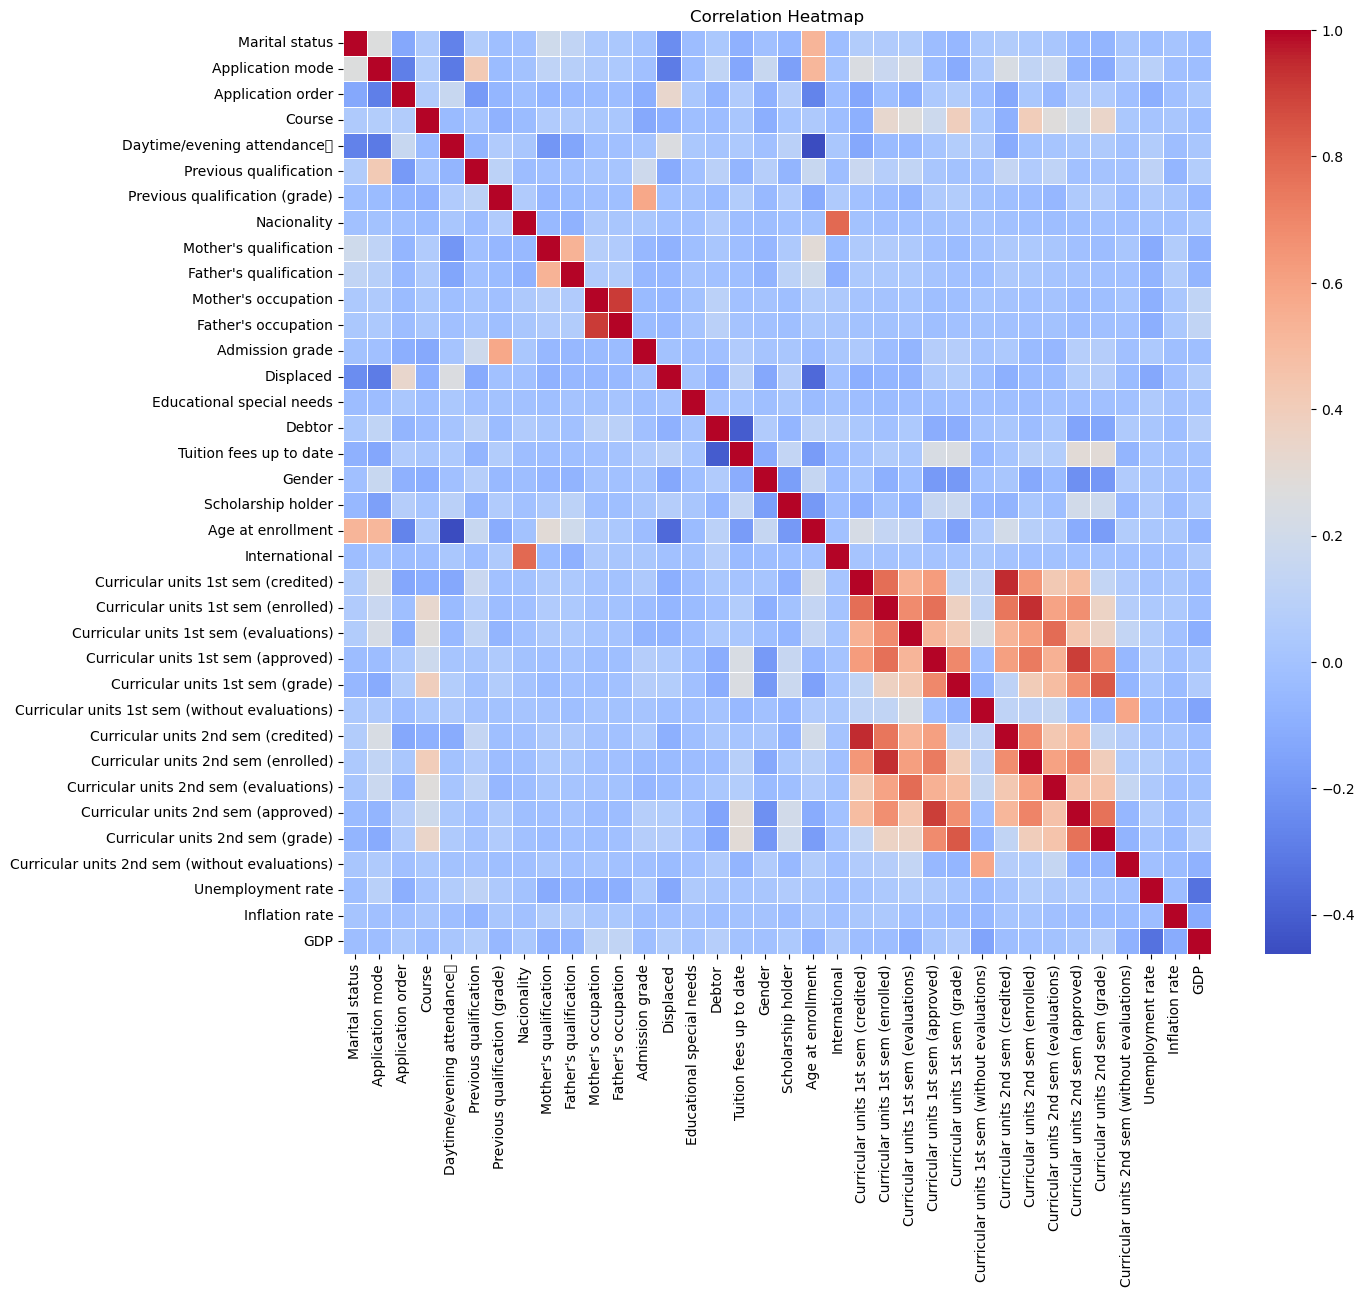

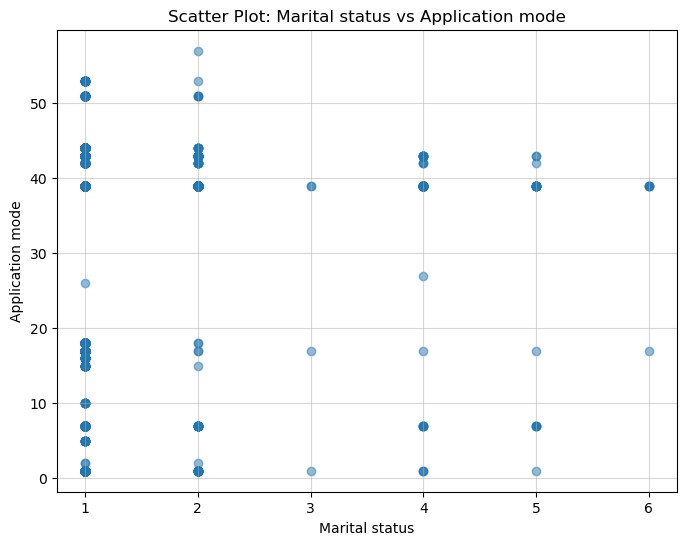

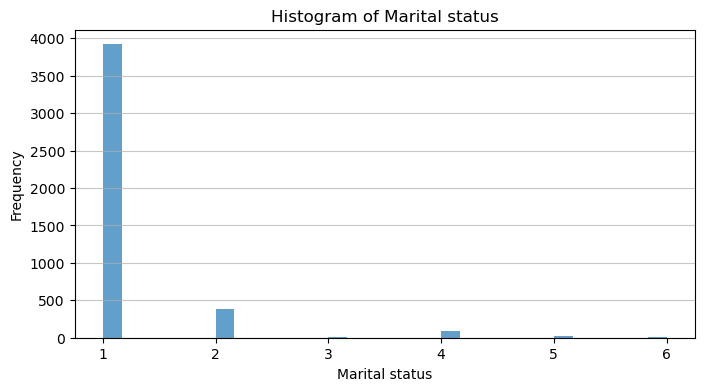

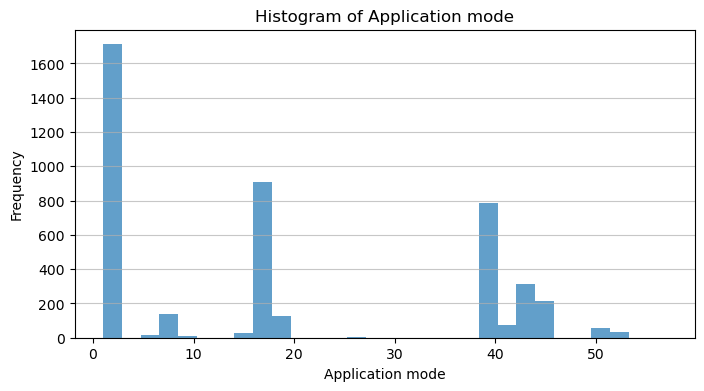

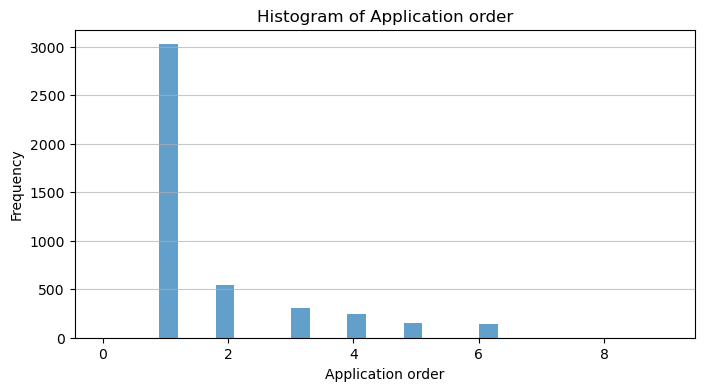

C:\Users\CG USER\miniconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\CG USER\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


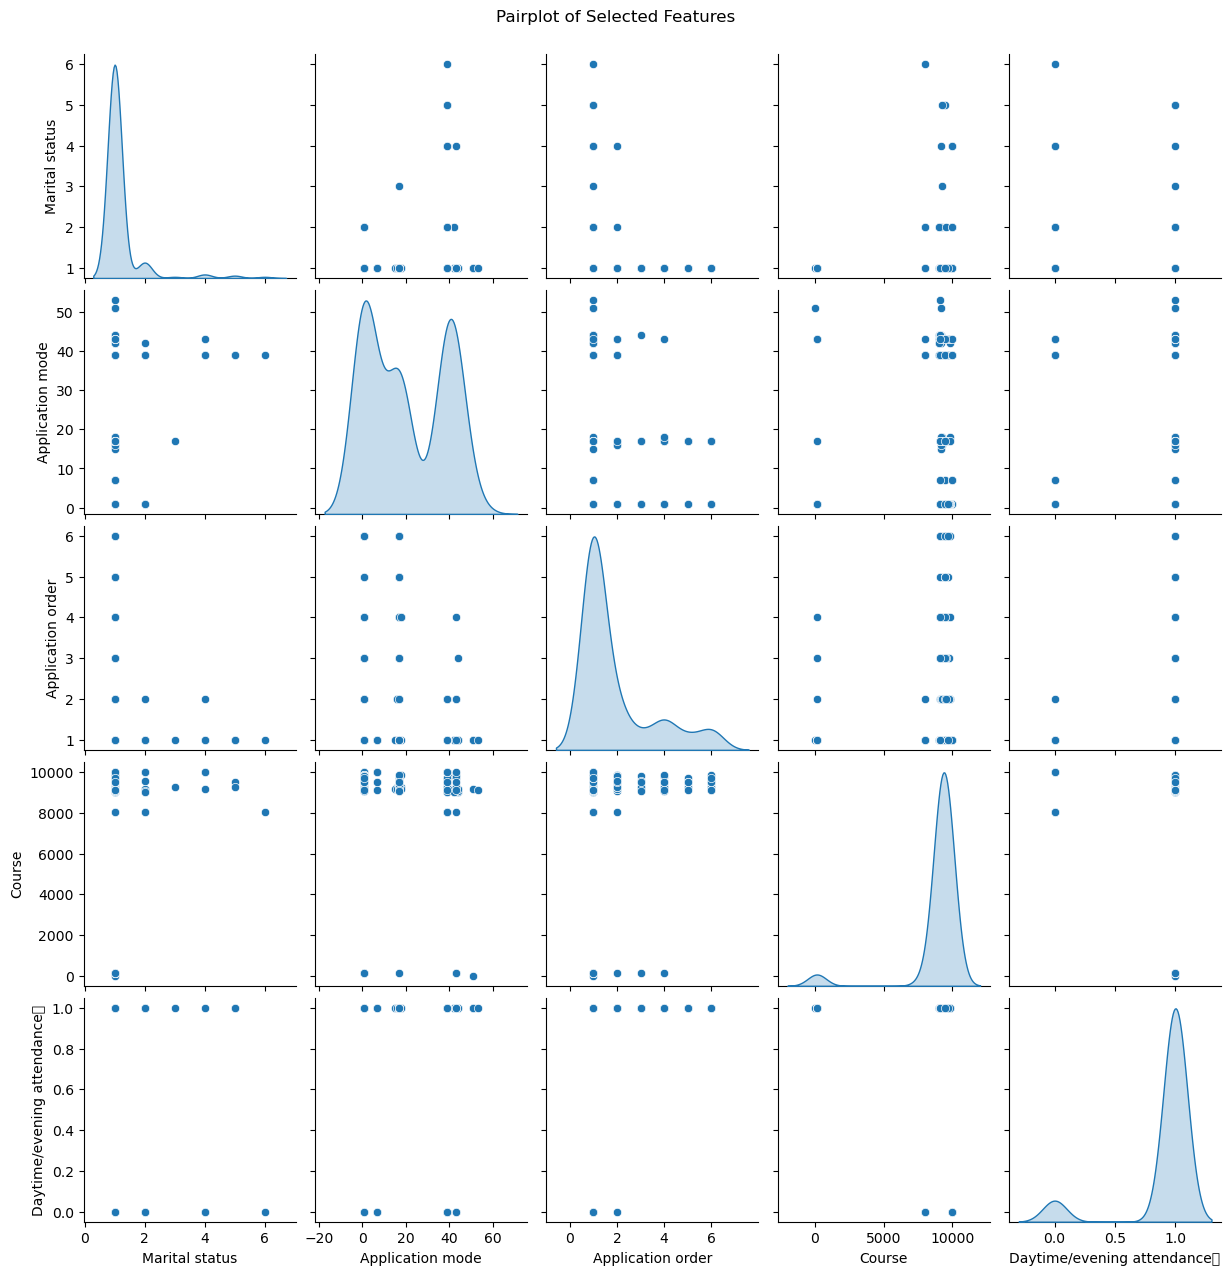

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distributions of numerical features
plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical_columns[:6]):  # Limit to 6 columns for visualization
    plt.subplot(2, 3, i + 1)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(14, 12))
correlation_matrix = data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Scatter plot between two randomly selected numerical features
feature_x, feature_y = numerical_columns[:2]  # Adjust as needed
plt.figure(figsize=(8, 6))
plt.scatter(data[feature_x], data[feature_y], alpha=0.5)
plt.title(f"Scatter Plot: {feature_x} vs {feature_y}")
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.grid(alpha=0.5)
plt.show()

# Histograms for the first few numerical features
for col in numerical_columns[:3]:  # Adjust the range for more features
    plt.figure(figsize=(8, 4))
    plt.hist(data[col], bins=30, alpha=0.7)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.7)
    plt.show()

# Pairplot of selected features
sns.pairplot(data[numerical_columns[:5]].sample(200), diag_kind='kde')  # Adjust the sampling as needed
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

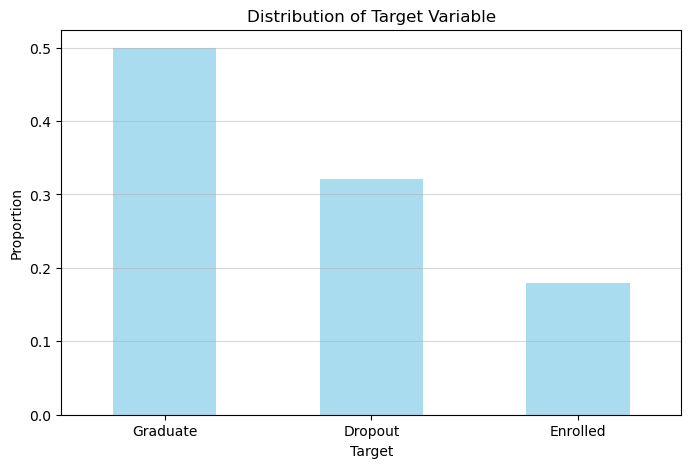

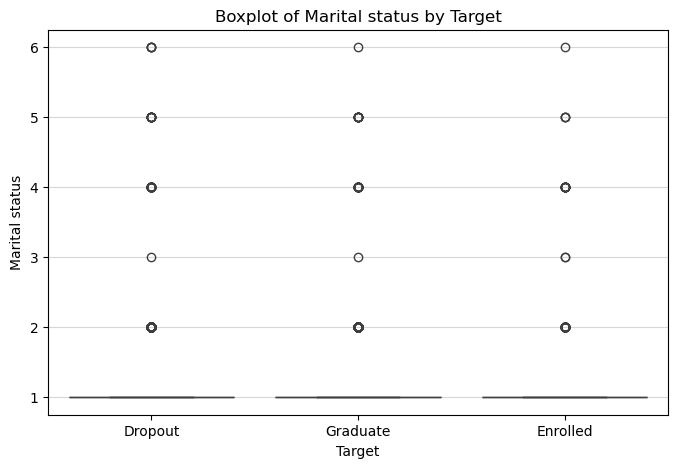

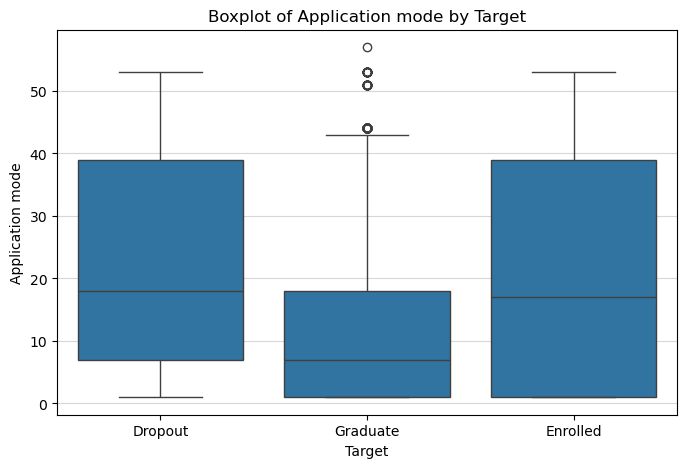

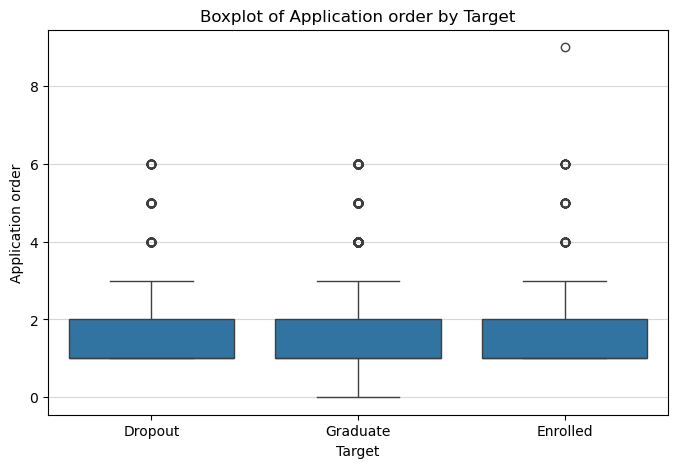

In [3]:
# Target variable distribution
if 'Target' in data.columns:
    target_distribution = data['Target'].value_counts(normalize=True)
    
    # Plot the target distribution
    plt.figure(figsize=(8, 5))
    target_distribution.plot(kind='bar', alpha=0.7, color='skyblue')
    plt.title("Distribution of Target Variable")
    plt.xlabel("Target")
    plt.ylabel("Proportion")
    plt.xticks(rotation=0)
    plt.grid(axis='y', alpha=0.5)
    plt.show()

# Boxplots to analyze feature distribution by target category
if 'Target' in data.columns:
    # Select a few numerical features for comparison
    features_to_compare = numerical_columns[:3]  # First 3 numerical features for simplicity
    
    for feature in features_to_compare:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=data['Target'], y=data[feature])
        plt.title(f"Boxplot of {feature} by Target")
        plt.xlabel("Target")
        plt.ylabel(feature)
        plt.grid(axis='y', alpha=0.5)
        plt.show()

**3. Model Train**

3.1 PCA(Dimensionality Reduction)

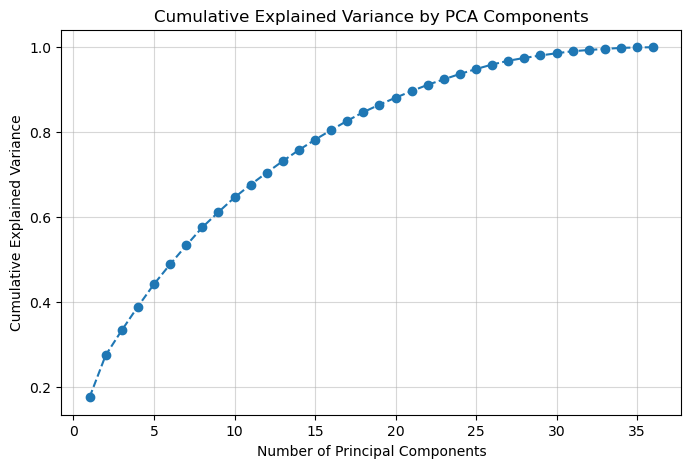

array([0.17666395, 0.0988699 , 0.05862559, 0.05585338, 0.05259359,
       0.04674366, 0.04426997, 0.04268044, 0.03588182, 0.03435778])

In [4]:
from sklearn.decomposition import PCA
import numpy as np

# Apply PCA to the dataset
pca = PCA()
pca_result = pca.fit_transform(data_unsupervised[numerical_columns])

# Plot the explained variance ratio to decide the number of components to retain
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(alpha=0.5)
plt.show()

# Display the explained variance ratio of the first few components
explained_variance_ratio[:10]

3.2 K-Means 

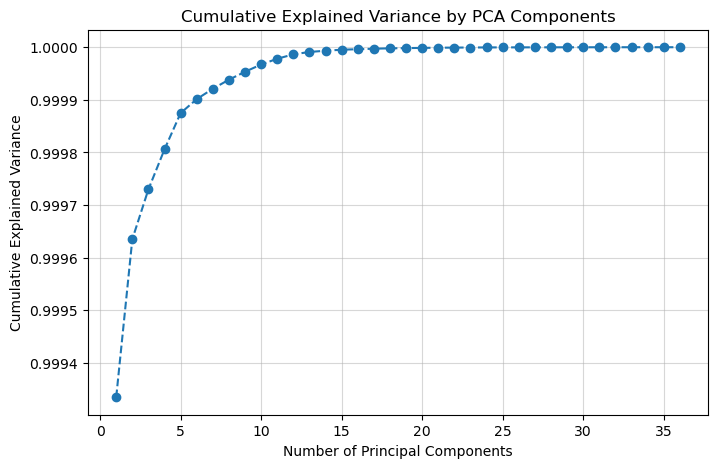

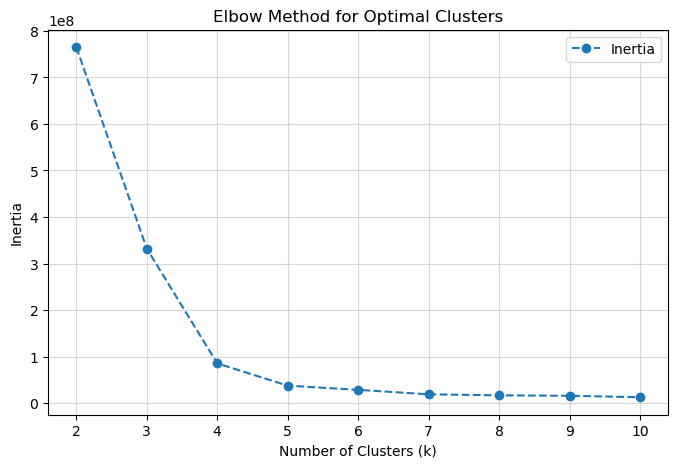

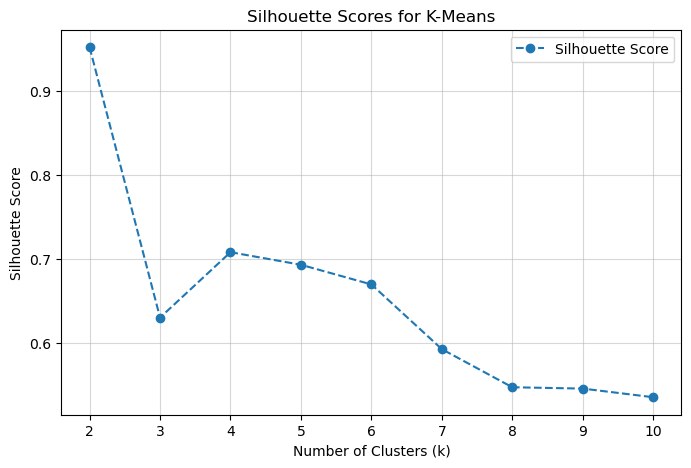

[(2, 764864753.1663831, 0.9519881667270784),
 (3, 332180556.7270577, 0.6304916121954556),
 (4, 85551415.44136816, 0.7082779014542581),
 (5, 37653750.8495398, 0.6933322084206074),
 (6, 28675119.4469634, 0.6699504090798231),
 (7, 19054965.660579227, 0.5929767865051448),
 (8, 16895892.270021945, 0.5477120033772106),
 (9, 15927283.260385811, 0.5461076208150923),
 (10, 12810669.580710214, 0.5358502820031026)]

In [5]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# PCA for Dimensionality Reduction
pca = PCA()
pca_result = pca.fit_transform(data[numerical_columns])

# Plot cumulative explained variance to decide the number of components
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(alpha=0.5)
plt.show()

# Use the first 10 principal components for clustering
num_components = 10
pca_reduced = PCA(n_components=num_components)
reduced_data = pca_reduced.fit_transform(data[numerical_columns])

# K-Means Clustering
k_range = range(2, 11)  # Testing cluster sizes from 2 to 10
inertia = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(reduced_data, kmeans.labels_))

# Plot the Elbow Method results
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--', label='Inertia')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.legend()
plt.grid(alpha=0.5)
plt.show()

# Plot the Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--', label='Silhouette Score')
plt.title("Silhouette Scores for K-Means")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.legend()
plt.grid(alpha=0.5)
plt.show()

# Display inertia and silhouette scores for the tested values of k
list(zip(k_range, inertia, silhouette_scores))


K-Means Clustering with 3 clusters

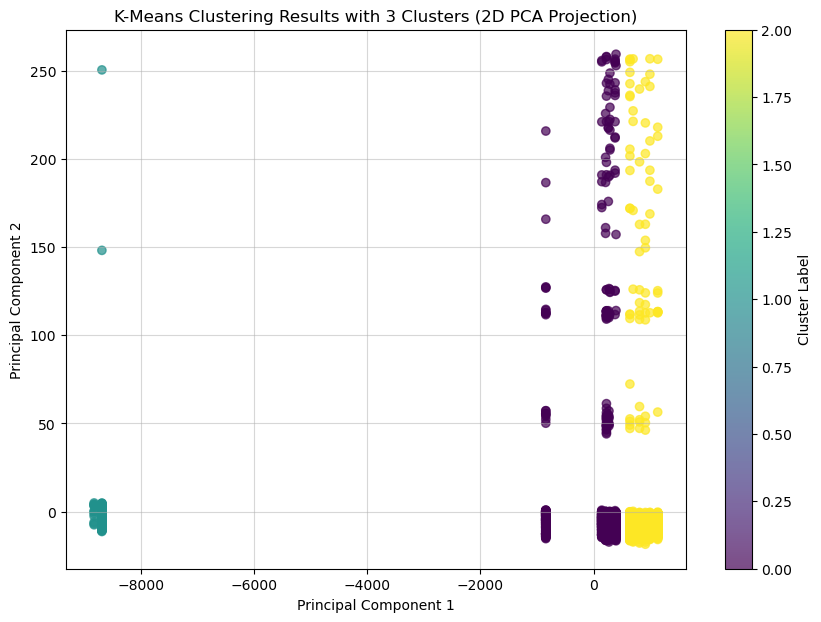

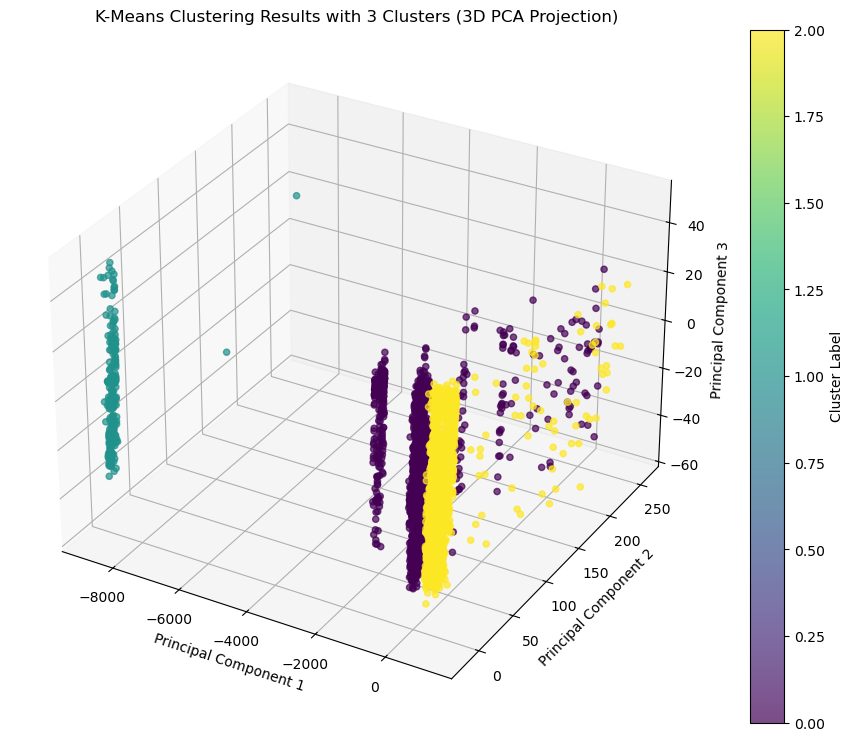

In [6]:
# Choose the optimal number of clusters (e.g., from the Elbow or Silhouette results)
optimal_k = 3  # Adjust based on analysis
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(reduced_data)

# Add the cluster labels to the PCA-reduced data
cluster_labels = kmeans.labels_

# Visualize clustering results in 2D using the first two principal components
plt.figure(figsize=(10, 7))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.title(f"K-Means Clustering Results with {optimal_k} Clusters (2D PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster Label")
plt.grid(alpha=0.5)
plt.show()

#  Visualize clustering results in 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2],
                      c=cluster_labels, cmap='viridis', alpha=0.7)
ax.set_title(f"K-Means Clustering Results with {optimal_k} Clusters (3D PCA Projection)")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
fig.colorbar(scatter, ax=ax, label="Cluster Label")
plt.show()

**3.3 DBSCANS**

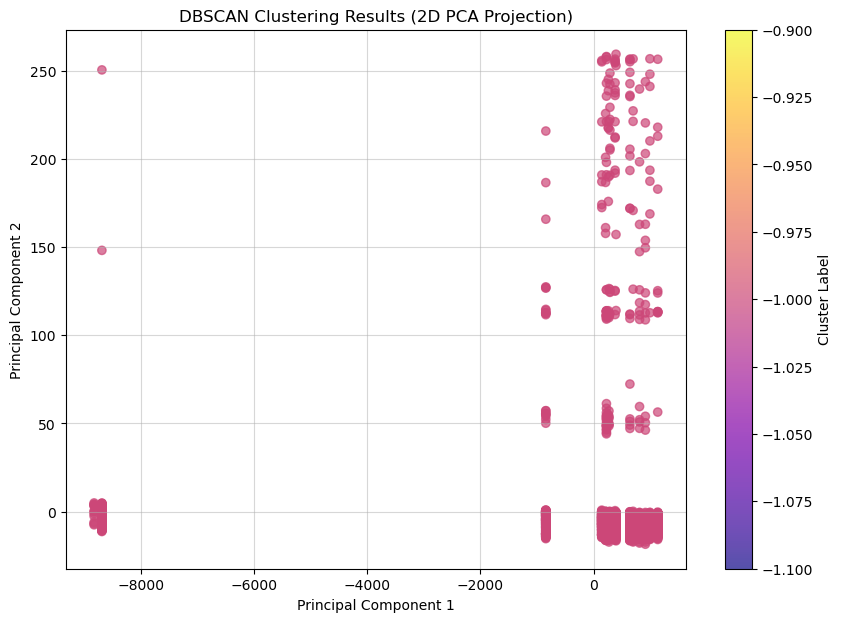

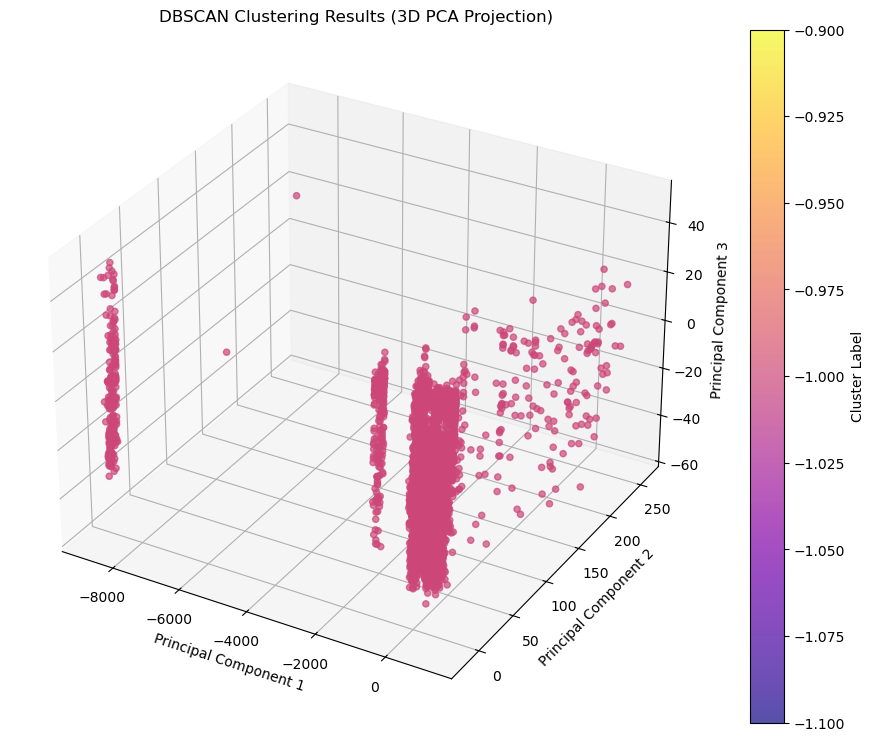

(0, 4424, 'Not Applicable (only one cluster)')

In [7]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Using DBSCAN for clustering
dbscan = DBSCAN(eps=1.0, min_samples=10)  # Adjusting hyperparameters as needed
dbscan_labels = dbscan.fit_predict(reduced_data)

# Count unique clusters
unique_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
noise_points = list(dbscan_labels).count(-1)

# Silhouette Score (only for clusters >= 2)
if unique_clusters > 1:
    dbscan_silhouette = silhouette_score(reduced_data, dbscan_labels)
else:
    dbscan_silhouette = "Not Applicable (only one cluster)"

# 2D Visualization of DBSCAN results
plt.figure(figsize=(10, 7))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=dbscan_labels, cmap='plasma', alpha=0.7)
plt.title("DBSCAN Clustering Results (2D PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster Label")
plt.grid(alpha=0.5)
plt.show()

# 3D Visualization of DBSCAN results
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2],
                      c=dbscan_labels, cmap='plasma', alpha=0.7)
ax.set_title("DBSCAN Clustering Results (3D PCA Projection)")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
fig.colorbar(scatter, ax=ax, label="Cluster Label")
plt.show()

unique_clusters, noise_points, dbscan_silhouette
